##Problem Statement

“Helping an online used-car marketplace optimize pricing and inventory decisions through data-driven insights.”P


roblem: Identify the main factors influencing selling_price so the dealer can set prices scientifically rather than relying on guesswork.

Problem: Analyze if fuel type significantly affects resale value, controlling for car age and mileage.

Problem: Compare selling prices of automatic vs manual cars for the same model/year range.

Problem: Quantify the depreciation rate of cars over the years and check if the drop is consistent across brands.

Problem: See if high-mileage cars (km per liter) get significantly higher resale prices.





In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
! gdown 1RhgXPyxRKQUpMJZzG-k78eKc7eUkbuWi

Downloading...
From: https://drive.google.com/uc?id=1RhgXPyxRKQUpMJZzG-k78eKc7eUkbuWi
To: /content/cars24-car-price.csv
100% 1.79M/1.79M [00:00<00:00, 11.0MB/s]


In [ ]:
df = pd.read_csv('cars24-car-price.csv')

In [ ]:
df.head()

,full_name,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,1.20,2012.0,Individual,120000,Petrol,Manual,19.70,796.0,46.30,5.0
1,Hyundai Grand i10 Asta,5.50,2016.0,Individual,20000,Petrol,Manual,18.90,1197.0,82.00,5.0
2,Hyundai i20 Asta,2.15,2010.0,Individual,60000,Petrol,Manual,17.00,1197.0,80.00,5.0
3,Maruti Alto K10 2010-2014 VXI,2.26,2012.0,Individual,37000,Petrol,Manual,20.92,998.0,67.10,5.0
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.70,2015.0,Dealer,30000,Diesel,Manual,22.77,1498.0,98.59,5.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19980 entries, 0 to 19979
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   full_name          19980 non-null  object 
 1   selling_price      19980 non-null  float64
 2   year               19980 non-null  float64
 3   seller_type        19980 non-null  object 
 4   km_driven          19980 non-null  int64  
 5   fuel_type          19980 non-null  object 
 6   transmission_type  19980 non-null  object 
 7   mileage            19980 non-null  float64
 8   engine             19980 non-null  float64
 9   max_power          19980 non-null  float64
 10  seats              19980 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.7+ MB


There are no null values present in the data set.

In [ ]:
#make the year column to int64
df['year'] = df['year'].astype('int64')

In [ ]:
df.describe()

,selling_price,year,km_driven,mileage,engine,max_power,seats
count,19980.000000,19980.000000,1.998000e+04,19980.000000,19980.000000,19980.000000,19980.000000
mean,7.392066,2014.525125,5.824488e+04,19.347219,1476.327401,97.854443,5.317868
std,9.103088,3.249185,5.172509e+04,4.620053,520.449398,45.080670,0.835370
min,0.250000,1991.000000,1.000000e+02,0.000000,0.000000,5.000000,2.000000
25%,3.400000,2013.000000,3.116425e+04,16.800000,1197.000000,73.900000,5.000000
50%,5.200000,2015.000000,5.200000e+04,19.160000,1248.000000,86.700000,5.000000
75%,7.850000,2017.000000,7.400000e+04,22.320000,1582.000000,112.000000,5.000000
max,395.000000,2021.000000,3.800000e+06,120.000000,6752.000000,626.000000,14.000000


We can take analyze selling price, Km_driven,mileage,engine, maxpower and seats from these numerical columns.

Selling price - The spread of the selling price of the cars are 25k to 3.95cr with the mean at 7.39 lakhs.

km_driven - The spread of the km_driven is from 100km to 38 lakh km with mean at 58244 km .

mileage - The spread of mileage is from 4.62km/lt to 120km with a mean at 19.34km/lt. The max value of 120km can possibly be for an electric vehicle.

engine - The spread of engine displacement is from 0cc to 6752cc with a mean at 1476cc. The zero value can indicate an electric vehicle as they dont have engines.

max_power - The spread of max power ranges from 5 HP  to 626 HP with a mean at 97 HP.

seats - The spread of number of seats ranges from 2 to 14 with a mean at 5.3(5)

In [ ]:
df.isnull().sum()

,0
full_name,0
selling_price,0
year,0
seller_type,0
km_driven,0
fuel_type,0
transmission_type,0
mileage,0
engine,0
max_power,0


confirmation of no null values.

In [ ]:
df.nunique()

,0
full_name,3321
selling_price,1215
year,28
seller_type,3
km_driven,4499
fuel_type,5
transmission_type,2
mileage,533
engine,172
max_power,490


In [ ]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

The data set has three types of sellers - Individual, dealers and trustmark dealer.

In [ ]:
df['transmission_type'].unique()

array(['Manual', 'Automatic'], dtype=object)

The dataset has two types of transmissions - manual and automatic

In [ ]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

The data set has five  fuel types - Pertrol, Diesel, CNG, LPG and Electric

Feature Engineering

Before we move into EDA we can do feature engineering from the column full_name. We can create two columns - Make and Model.


In [ ]:
#Take the first word from full_name and put it into Make column
df['Make'] = df['full_name'].str.split().str[0]

In [ ]:
# Take the rest of the full name as put it into model column
df['Model'] = df['full_name'].str.split().str[1:].str.join(' ')

In [ ]:
df.head()

,full_name,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,Make,Model
0,Maruti Alto Std,1.20,2012,Individual,120000,Petrol,Manual,19.70,796.0,46.30,5.0,Maruti,Alto Std
1,Hyundai Grand i10 Asta,5.50,2016,Individual,20000,Petrol,Manual,18.90,1197.0,82.00,5.0,Hyundai,Grand i10 Asta
2,Hyundai i20 Asta,2.15,2010,Individual,60000,Petrol,Manual,17.00,1197.0,80.00,5.0,Hyundai,i20 Asta
3,Maruti Alto K10 2010-2014 VXI,2.26,2012,Individual,37000,Petrol,Manual,20.92,998.0,67.10,5.0,Maruti,Alto K10 2010-2014 VXI
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.70,2015,Dealer,30000,Diesel,Manual,22.77,1498.0,98.59,5.0,Ford,Ecosport 2015-2021 1.5 TDCi Titanium BSIV


##Exploratory Data Analysis
##Univariate Analysis


In [ ]:
#Value count of make
df['Make'].value_counts()

,count
Make,
Maruti,5650
Hyundai,3646
Honda,1781
Mahindra,1291
Toyota,1205
Tata,975
Ford,908
Volkswagen,762
Renault,636


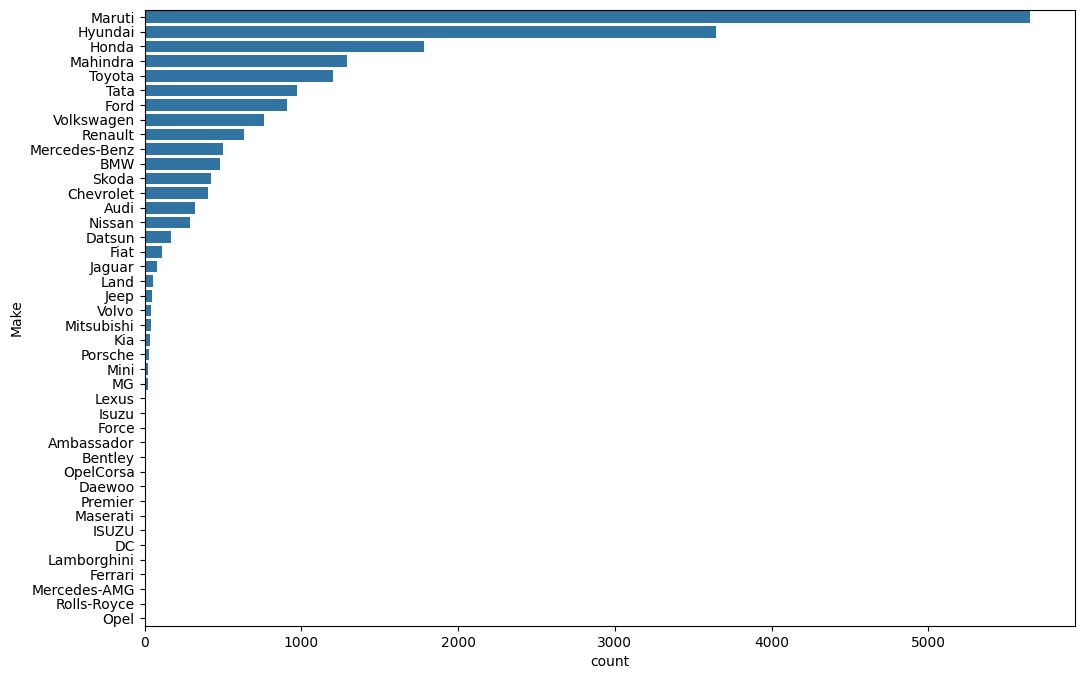

In [ ]:
# Make of Vehicles
plt.figure(figsize=(12,8))
sns.countplot(df,y='Make',order=df['Make'].value_counts().index)
plt.xticks(rotation=0)

plt.show()

The illustration above represents the Distribution of Make of Cars. Maruti has the most count in stock with over 5000 cars. This is about 25% of the entire data set.

We can see that the top segment of the chart account for most car counts in stock. The rest of the car counts are negligable comparitvely.

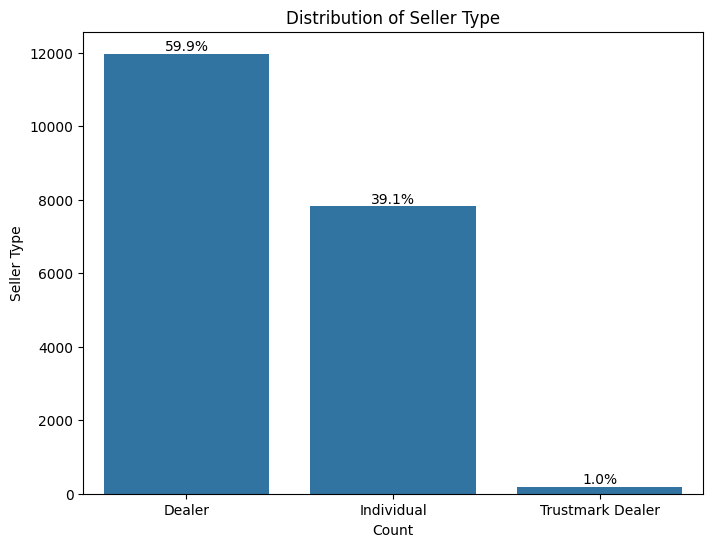

In [ ]:
# Seller Types
plt.figure(figsize=(8,6))
ax = sns.countplot(data=df, x='seller_type',order=df['seller_type'].value_counts().index)

total = len(df['seller_type'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 # Position the label in the middle of the bar horizontally
    y = p.get_height() # Position the label at the top of the bar
    ax.annotate(percentage, (x, y), ha='center', va='bottom') # Anchor the text to the bottom of the annotation point

plt.title('Distribution of Seller Type')
plt.xlabel('Count')
plt.ylabel('Seller Type')

plt.show()

The graph above represents the distribution of seller types in the dataset. Most sellers are dealers with 60%, while Individual owners are not too far behind with about 39%. The Trustmark Dealer types are negligable comparatively at 1%.

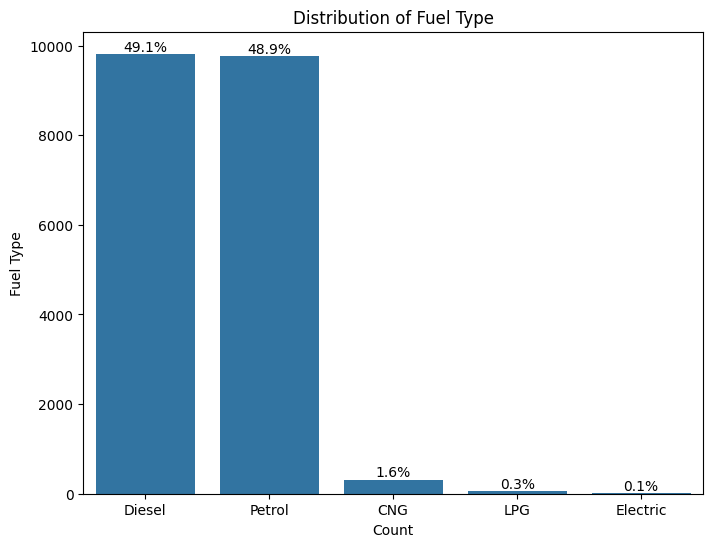

In [ ]:
#Fuel Type
plt.figure(figsize=(8,6))
ax = sns.countplot(data=df, x='fuel_type',order=df['fuel_type'].value_counts().index)

total = len(df['fuel_type'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 # Position the label in the middle of the bar horizontally
    y = p.get_height()+150 # Position the label at the top of the bar
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.title('Distribution of Fuel Type')
plt.xlabel('Count')
plt.ylabel('Fuel Type')

plt.show()

This graph illustrates the distribution of fuel types in the cars. We can see that Diesel and Petrol cars account most counts with about 49% each. CNG,LPG and Electric vehicles are negligable in this dataset accounting for 2% in total. While the diesel and petrol will probabily still have the majority in 2025, the dataset has cars from the 1991-2021 and the mean is 2014. This can be the reason for the numbers we see.

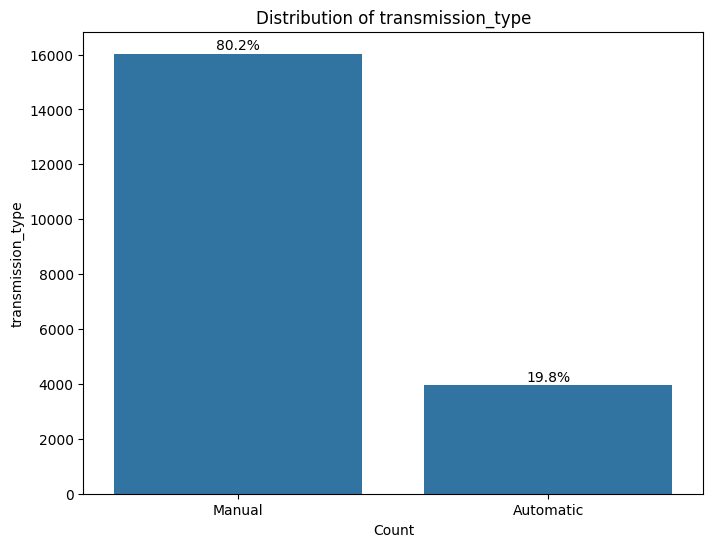

In [ ]:
#Transmission Type

plt.figure(figsize=(8,6))
ax = sns.countplot(data=df, x='transmission_type',order=df['transmission_type'].value_counts().index)

total = len(df['transmission_type'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 # Position the label in the middle of the bar horizontally
    y = p.get_height()+300 # Position the label at the top of the bar
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.title('Distribution of transmission_type')
plt.xlabel('Count')
plt.ylabel('transmission_type')

plt.show()

This graph illustrates the distribution of transmission type. The graph indicates that 80.2% of cars are manual while 19.8% are automatic cars. As the dataset has vehicles from 1991-2021 and the mean is at 2014, this figure is interesting as there are quite a few automatic vehicles in the the market.Automatic cars became popular in the recent years due to the comparitive lower price point to manual, which was high in earlier years.  

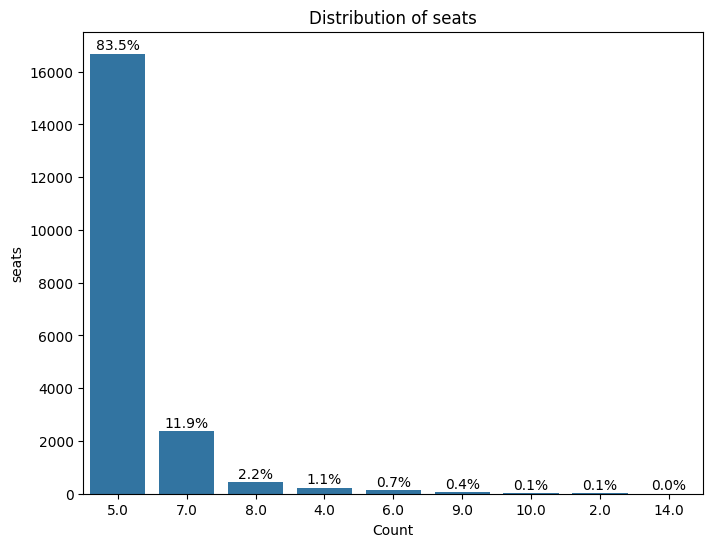

In [ ]:
#Seats

plt.figure(figsize=(8,6))
ax = sns.countplot(data=df, x='seats',order=df['seats'].value_counts().index)

total = len(df['seats'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 # Position the label in the middle of the bar horizontally
    y = p.get_height() + 300# Position the label at the top of the bar
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.title('Distribution of seats')
plt.xlabel('Count')
plt.ylabel('seats')

plt.show()

The graph illustrates the distribution of seats in the car. We can see that most cars are five seaters with 83.5% and 7 seaters with 11.9%. The rest of the types are negligable.

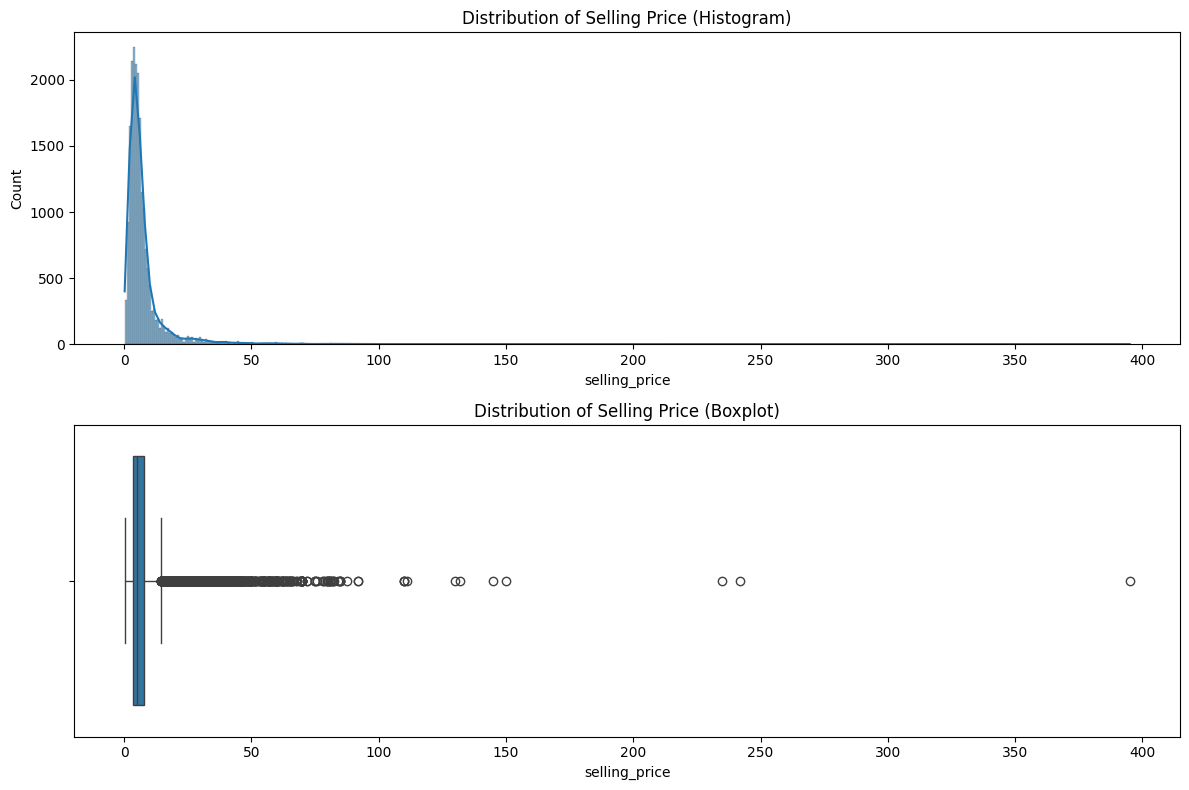

In [ ]:
#Selling Price
plt.figure(figsize=(12,8))

# Histogram
plt.subplot(2,1,1) # 2 rows, 1 column, first plot
sns.histplot(x=df['selling_price'],bins =500,kde=True)
plt.title('Distribution of Selling Price (Histogram)')


# Boxplot
plt.subplot(2,1,2) # 2 rows, 1 column, second plot
sns.boxplot(x=df['selling_price'])
plt.title('Distribution of Selling Price (Boxplot)')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

The graphs above illustrates the distribution of selling price in form of a histogram and a boxplot. The histogram shows a high positvely skewed distribution and a box plot confirm there are outliers present. To understand the range and median we will do another analysis after removing all outliers.

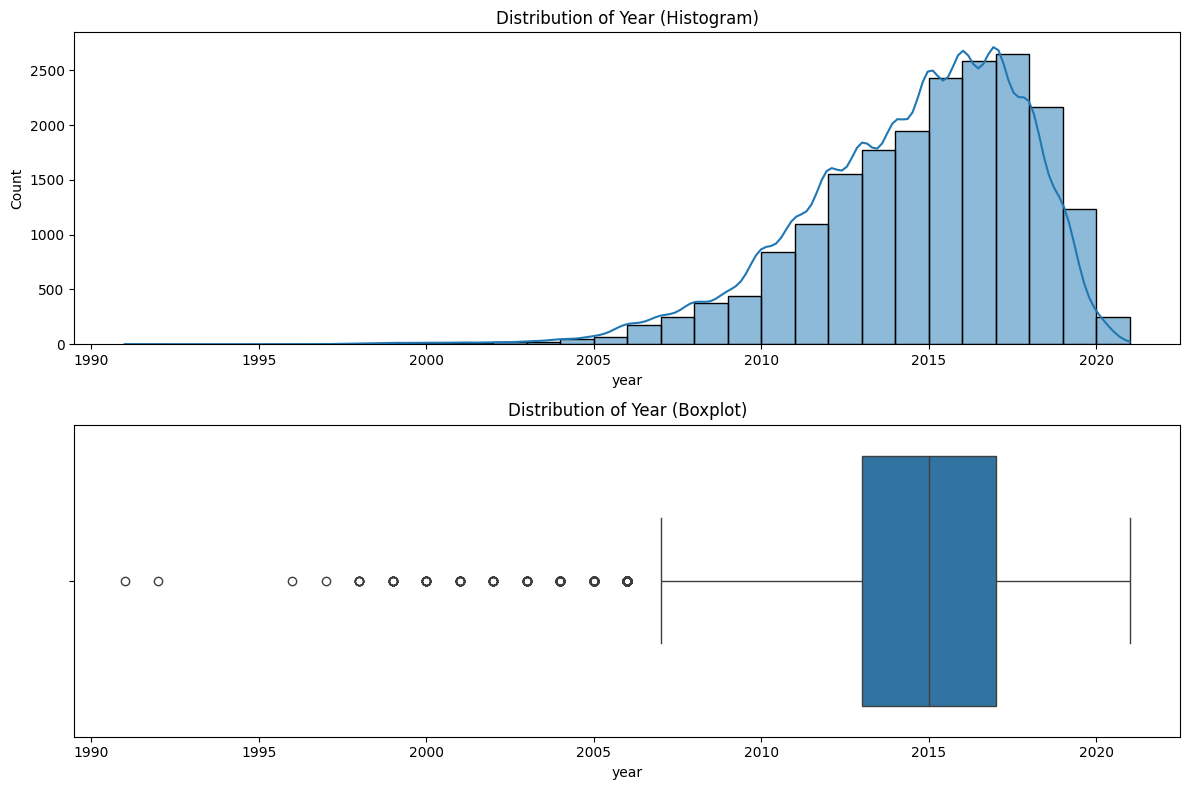

In [ ]:
# Year
plt.figure(figsize=(12,8))

#Histogram
plt.subplot(2,1,1) # 2 rows, 1 column, first plot
sns.histplot(x=df['year'],bins =30,kde=True)
plt.title('Distribution of Year (Histogram)')

#Boxplot
plt.subplot(2,1,2) # 2 rows, 1 column, second plot
sns.boxplot(x=df['year'])
plt.title('Distribution of Year (Boxplot)')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels

The plot above represents the distribution of year of make of the cars. It is evident that the data is highly negative skew with outliers present between 1990-2005. Most cars in this dataset range from 2012-2017 models with a median of 2015 models.We will further remove outliers.

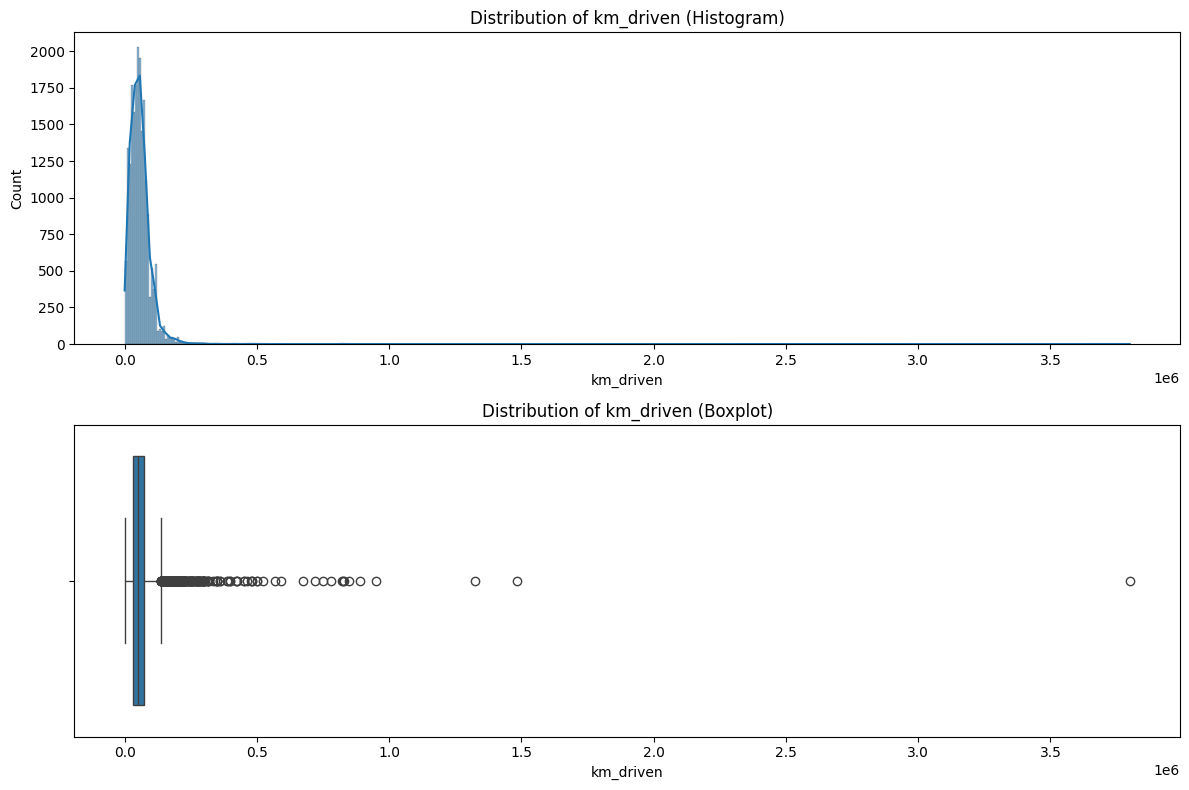

In [ ]:
#km_driven
plt.figure(figsize=(12,8))

#Histogram
plt.subplot(2,1,1) # 2 rows, 1 column, first plot
sns.histplot(x=df['km_driven'],bins =500,kde=True)
plt.title('Distribution of km_driven (Histogram)')

#Boxplot
plt.subplot(2,1,2) # 2 rows, 1 column, second plot
sns.boxplot(x=df['km_driven'])
plt.title('Distribution of km_driven (Boxplot)')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels

The graph above illustrates the distribution of kilometers driven by the car. The data is highly positively skewed distribution with outliers present. Further in the analysis we will remove the outliers and check the values again.  

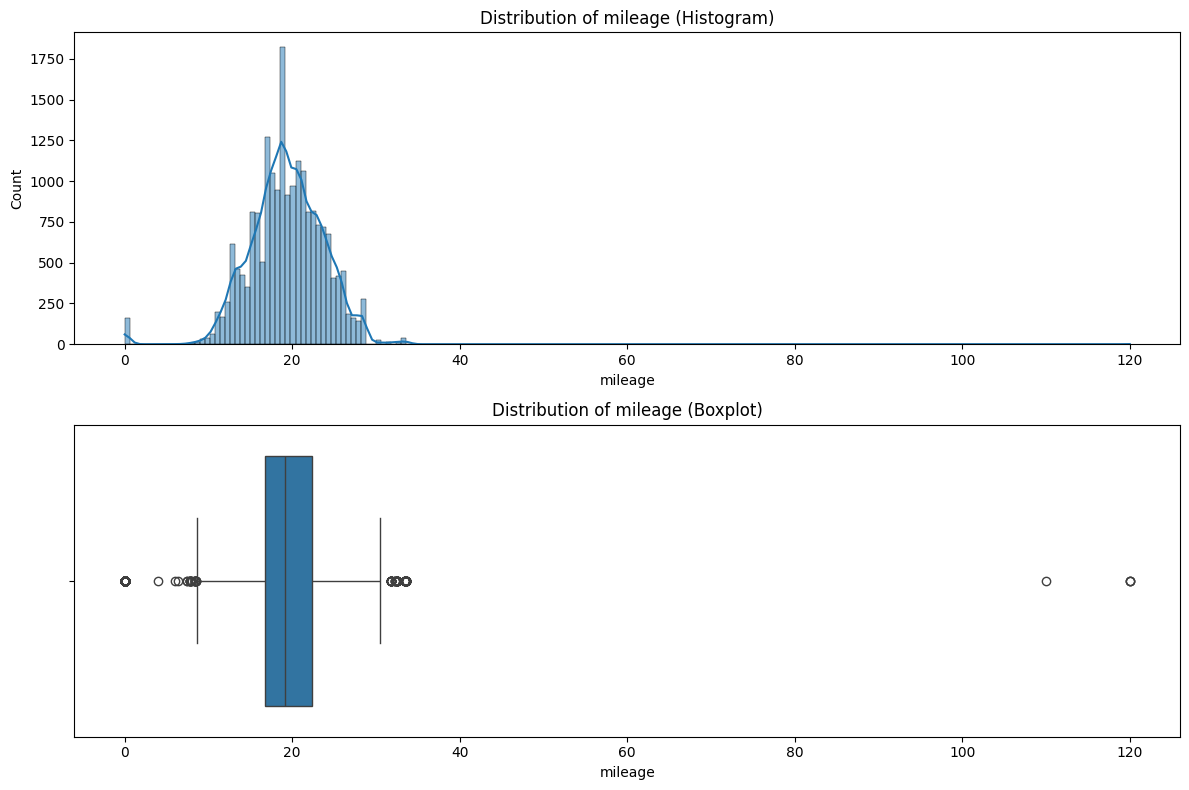

In [ ]:
#Mileage
plt.figure(figsize=(12,8))

#Histogram
plt.subplot(2,1,1) # 2 rows, 1 column, first plot
sns.histplot(x=df['mileage'],bins =200,kde=True)
plt.title('Distribution of mileage (Histogram)')

#Boxplot
plt.subplot(2,1,2) # 2 rows, 1 column, second plot
sns.boxplot(x=df['mileage'])
plt.title('Distribution of mileage (Boxplot)')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels

This graph illustrates the distribution of mileage of a car. The data, is positively skewed with outliers present. Most values range in this dataset from 17-23km/l, with a median of 19 km/l. Subsequently in this analysis all outliers will be removed.

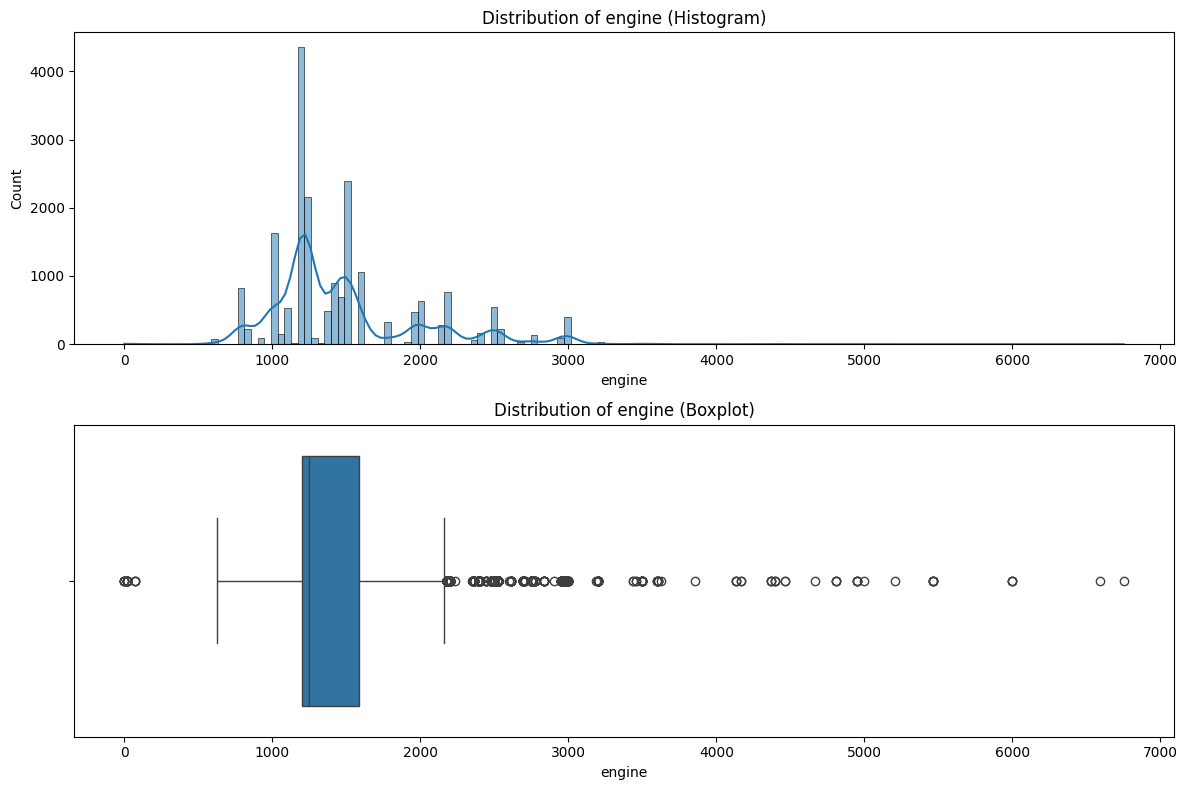

In [ ]:
#Engine
plt.figure(figsize=(12,8))

#Histogram
plt.subplot(2,1,1) # 2 rows, 1 column, first plot
sns.histplot(x=df['engine'],bins =150,kde=True)
plt.title('Distribution of engine (Histogram)')

#Boxplot
plt.subplot(2,1,2) # 2 rows, 1 column, second plot
sns.boxplot(x=df['engine'])
plt.title('Distribution of engine (Boxplot)')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels

The graph above illustrates the distribution of engine displacement of cars in the dataset. The distribution is positively skewed with outliers present. Most values ranges between 1200-1600cc with the median at about 1250cc. Subsequently the outliers will be removed.

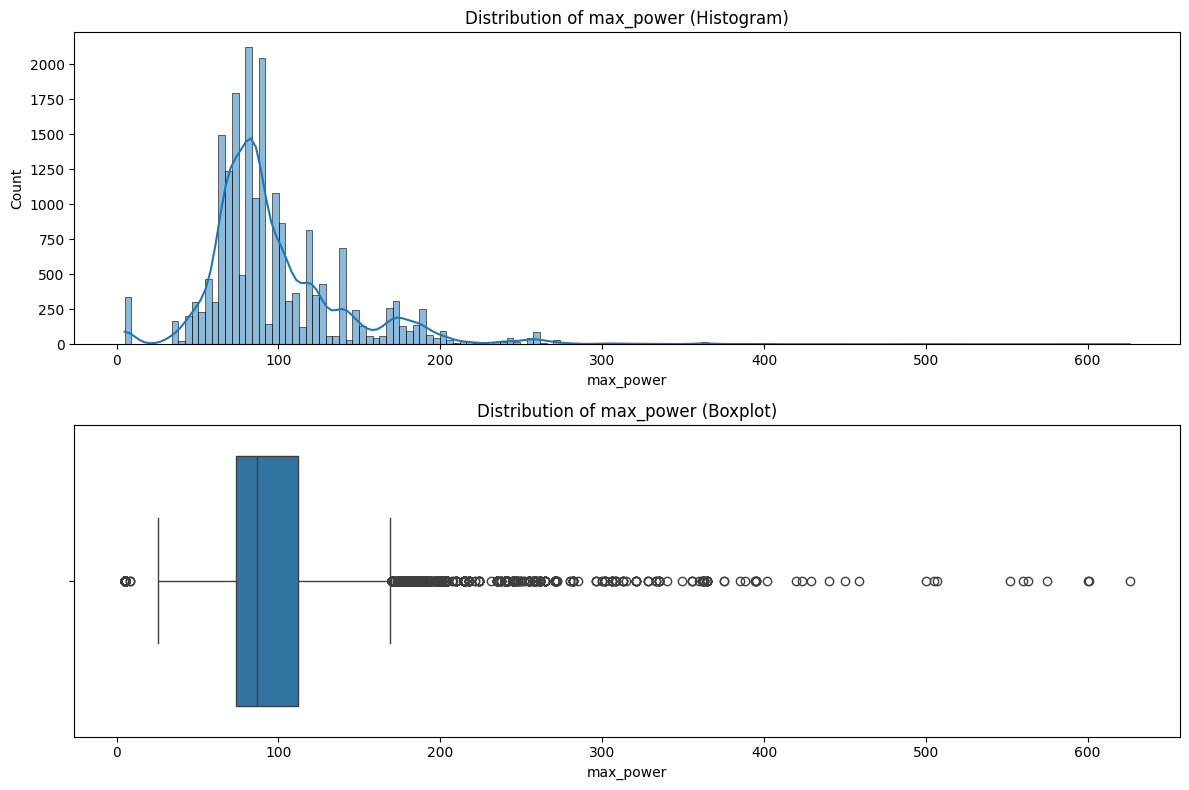

In [ ]:
#Max power
plt.figure(figsize=(12,8))

#Histogram
plt.subplot(2,1,1) # 2 rows, 1 column, first plot
sns.histplot(x=df['max_power'],bins =150,kde=True)
plt.title('Distribution of max_power (Histogram)')

#Boxplot
plt.subplot(2,1,2) # 2 rows, 1 column, second plot
sns.boxplot(x=df['max_power'])
plt.title('Distribution of max_power (Boxplot)')

plt.tight_layout() # Adjust layout

The graph above indicates the distribution of maximum power of the cars. The data has positvely skewed distribution with outliers present. Most values range from 80-110HP with the median at 90HP.

##Bivariate and Multivariate analysis


From the univariate analysis it is understood the spread is very large amongst the some of the variables. This need not indicate an outlier but a segment of cars.

Thus, creating an additional column named segment with labels - Premium, Luxury,indicating premium car and luxury car. This categorization can be done on make of car.

In [ ]:
#Luxury car makes
Luxury =['Ferrari','Rolls-Royce','Lamborghini','Bentley','Maserati','Porsche','Lexus','Mercedes-AMG','Land','Jaguar','BMW','Volvo','Mercedes-Benz','Mini','Audi','ISUZU','Isuzu','DC']

In [ ]:
#Premium car makes
Premium = ['Toyota','Mitsubishi','Skoda','Mahindra','Ford','Honda','Volkswagen','Force','Hyundai','Nissan','Maruti','Renault','Tata','Fiat','Datsun','Chevrolet','Premier','OpelCorsa','Opel','Ambassador','Daewoo']

In [ ]:
#Create series - Segment with two options Premium/Luxury

df['Segment'] = df['Make'].apply(lambda x: 'Luxury' if x in Luxury else 'Premium')

In [ ]:
df_premium = df[df['Segment']=='Premium']
df_luxury = df[df['Segment']=='Luxury']

In [ ]:
df.head()

,full_name,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,Make,Model,Segment
0,Maruti Alto Std,1.20,2012,Individual,120000,Petrol,Manual,19.70,796.0,46.30,5.0,Maruti,Alto Std,Premium
1,Hyundai Grand i10 Asta,5.50,2016,Individual,20000,Petrol,Manual,18.90,1197.0,82.00,5.0,Hyundai,Grand i10 Asta,Premium
2,Hyundai i20 Asta,2.15,2010,Individual,60000,Petrol,Manual,17.00,1197.0,80.00,5.0,Hyundai,i20 Asta,Premium
3,Maruti Alto K10 2010-2014 VXI,2.26,2012,Individual,37000,Petrol,Manual,20.92,998.0,67.10,5.0,Maruti,Alto K10 2010-2014 VXI,Premium
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.70,2015,Dealer,30000,Diesel,Manual,22.77,1498.0,98.59,5.0,Ford,Ecosport 2015-2021 1.5 TDCi Titanium BSIV,Premium


In [ ]:
df[df['Make']=='BMW']

,full_name,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,Make,Model,Segment
140,BMW 5 Series 530d M Sport,26.00,2016,Dealer,63000,Diesel,Automatic,18.59,2993.0,261.49,5.0,BMW,5 Series 530d M Sport,Luxury
180,BMW 3 Series 320d Luxury Line,20.90,2016,Dealer,68000,Diesel,Automatic,22.69,1995.0,190.00,5.0,BMW,3 Series 320d Luxury Line,Luxury
402,BMW Z4 M40i,82.50,2020,Dealer,2000,Petrol,Automatic,11.29,2998.0,335.00,2.0,BMW,Z4 M40i,Luxury
422,BMW 6 Series GT 630i Luxury Line,55.00,2018,Individual,30000,Petrol,Automatic,14.28,1998.0,254.70,4.0,BMW,6 Series GT 630i Luxury Line,Luxury
457,BMW X5 xDrive 30d xLine,79.00,2019,Individual,19000,Diesel,Automatic,13.38,2993.0,265.00,5.0,BMW,X5 xDrive 30d xLine,Luxury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19814,BMW 5 Series 520d Luxury Line,52.95,2019,Dealer,4000,Diesel,Automatic,18.12,1995.0,190.00,5.0,BMW,5 Series 520d Luxury Line,Luxury
19828,BMW 5 Series 520d Luxury Line,23.25,2014,Dealer,43000,Diesel,Automatic,18.12,1995.0,190.00,5.0,BMW,5 Series 520d Luxury Line,Luxury
19838,BMW X1 sDrive 20d xLine,29.00,2018,Dealer,39000,Diesel,Automatic,20.68,1995.0,188.00,5.0,BMW,X1 sDrive 20d xLine,Luxury
19870,BMW 3 Series 316i,10.00,1996,Individual,50000,Petrol,Automatic,11.90,1995.0,154.00,5.0,BMW,3 Series 316i,Luxury


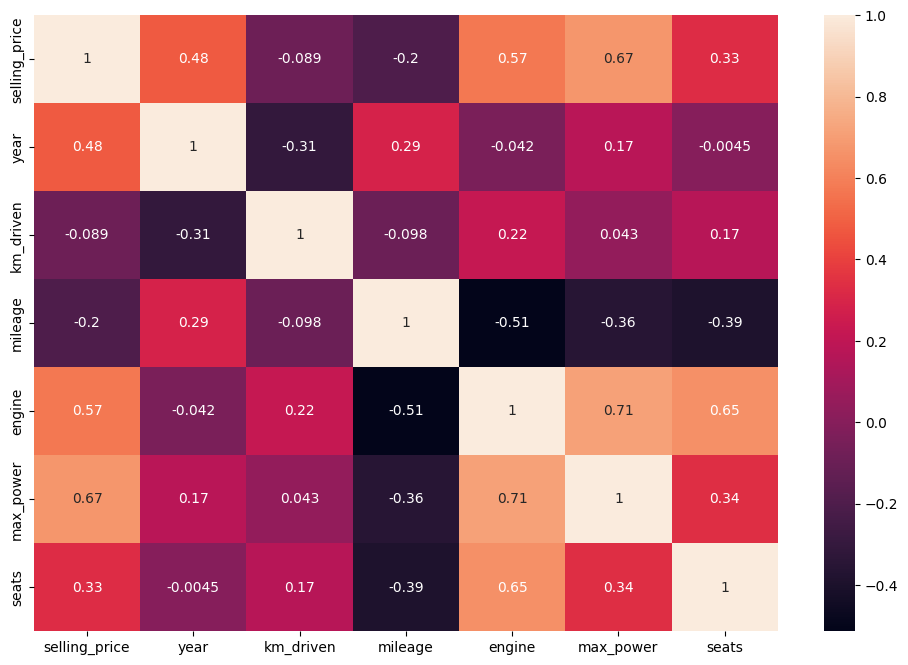

In [ ]:
#Heatmap premium cars
plt.figure(figsize=(12,8))
sns.heatmap(df_premium.select_dtypes(include=np.number).corr(),annot=True)
plt.show()

The graph above represents correlation between the numerical columns in the dataset. As our target variable is selling price, we will analyse it with other columns.

Selling Price with,

Year - 0.27, indicates a relationhsip but not very strong, meaning when year of model is recent the selling price will also increase.

km_driven - -0.1, indicates a negative relationship, that is when km driven is high the price of car will be low. But it is not very strong.

mileage - -0.25, indicates a negative relationship but not very strong.

Engine - 0.58, indicates a strong positive relationship. Higher the engine capacity, higher is the selling price.

Max Power - 0.73, indicates a strong positive relationship.

seats - 0.073, indicates not much of a relationship as it is very near 0.






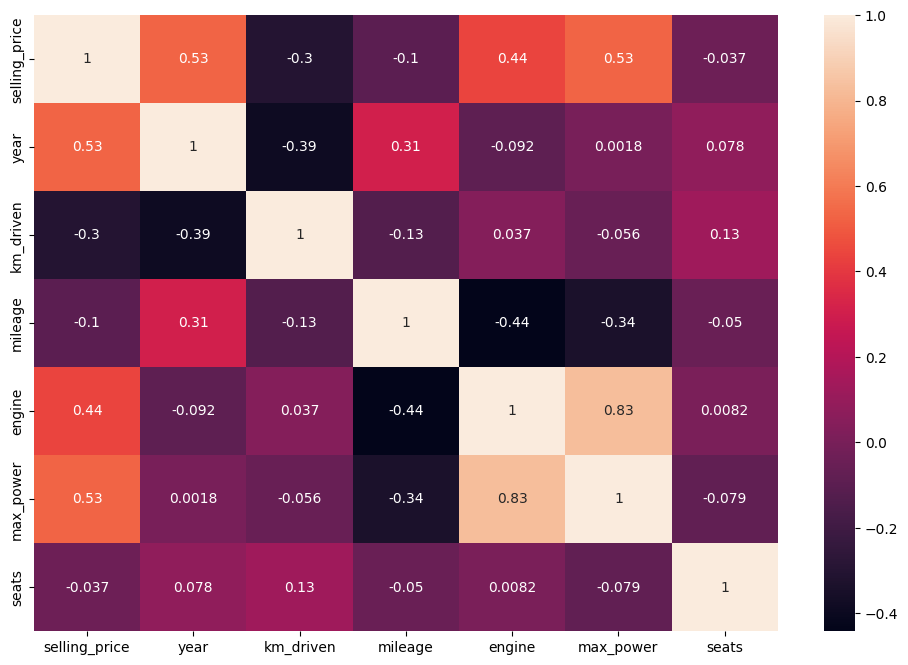

In [ ]:
#Heatmap luxury cars
plt.figure(figsize=(12,8))
sns.heatmap(df_luxury.select_dtypes(include=np.number).corr(),annot=True)
plt.show()

In [ ]:
df.shape

(19980, 14)

In [ ]:
# Create a list of numerical columns
num_col = ['selling_price','year','km_driven','mileage','engine','max_power']

In [ ]:
#creating a dataframe selecting only luxury vehicles
df_luxury = df[df['Segment']=='Luxury']

#creating a dataframe selecting only premium vehicles
df_premium = df[df['Segment']=='Premium']

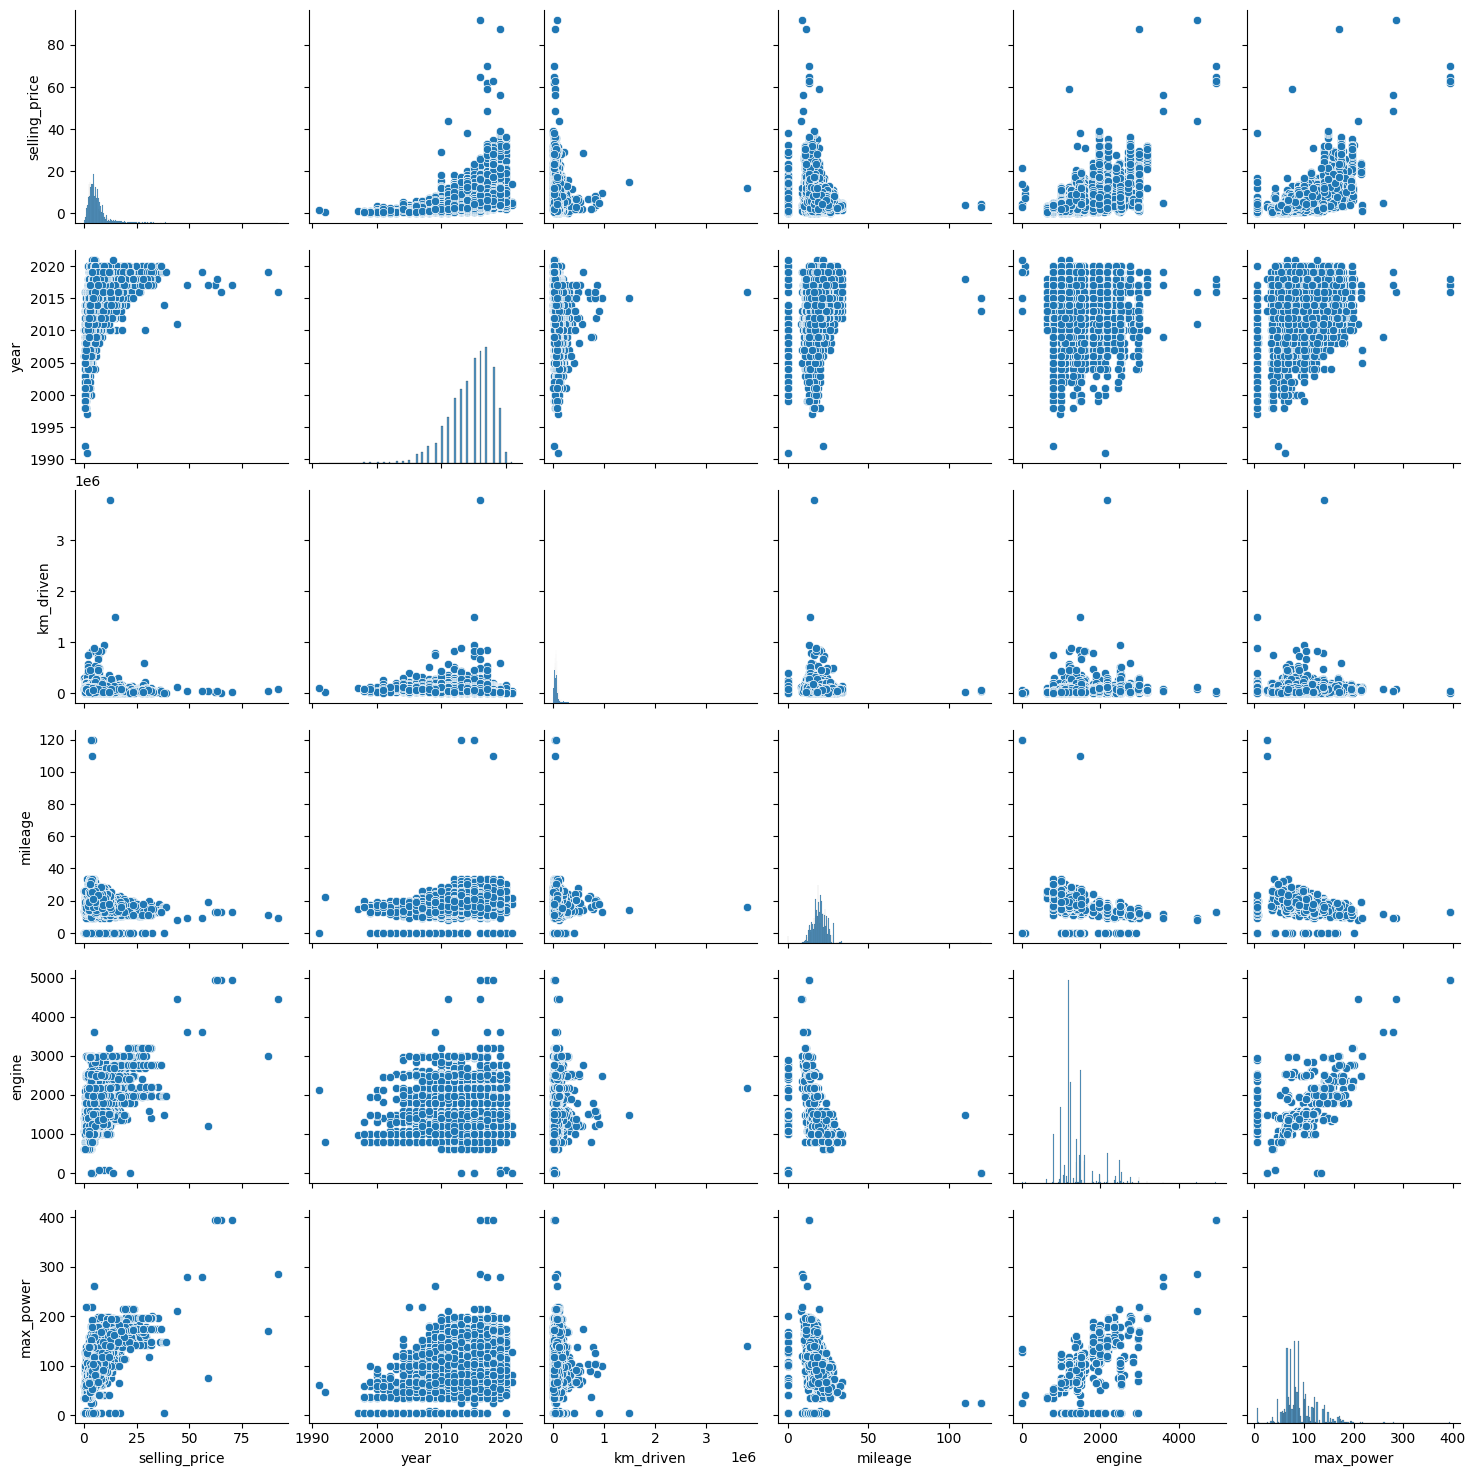

In [ ]:
sns.pairplot(df_premium[num_col])

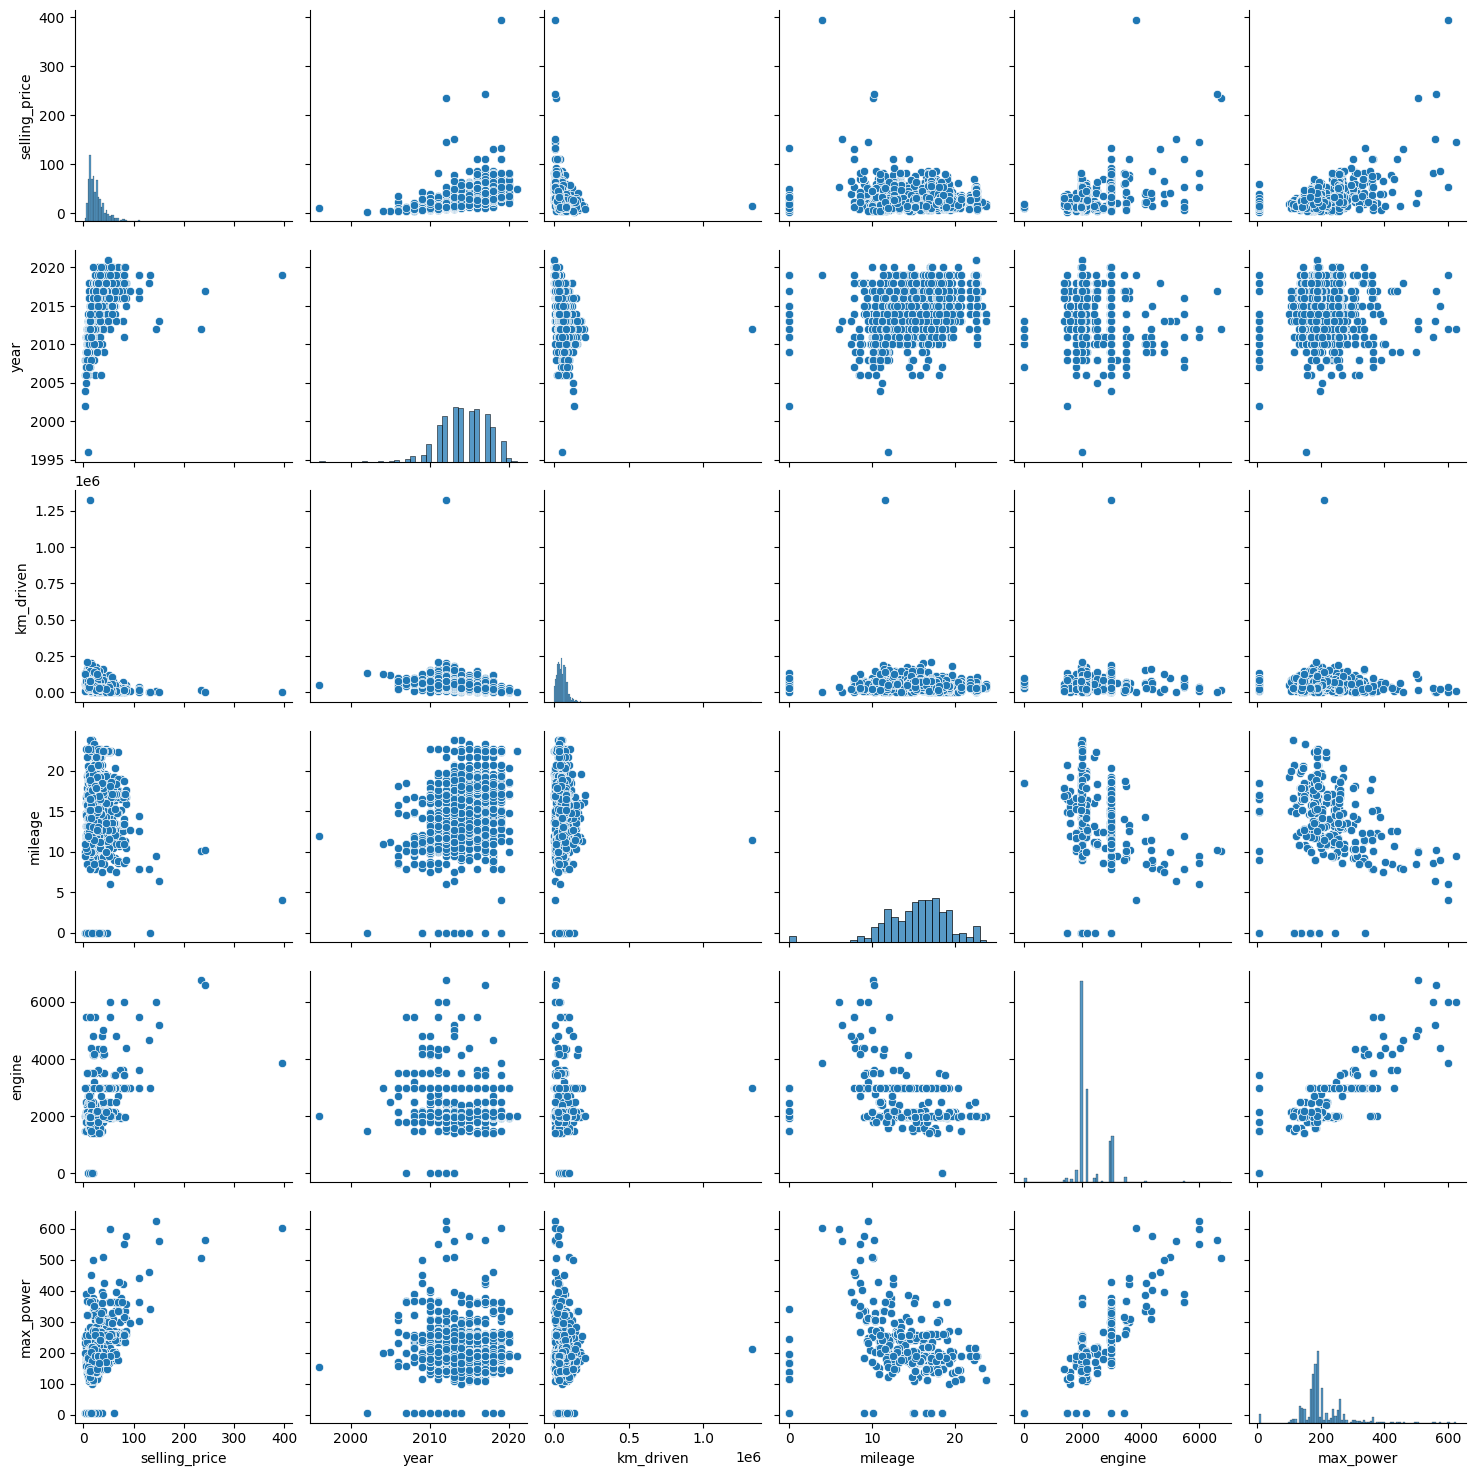

In [ ]:
sns.pairplot(df_luxury[num_col])

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 [Text(0.0, 0, '0'),
  Text(50.0, 0, '50'),
  Text(100.0, 0, '100'),
  Text(150.0, 0, '150'),
  Text(200.0, 0, '200'),
  Text(250.0, 0, '250'),
  Text(300.0, 0, '300'),
  Text(350.0, 0, '350'),
  Text(400.0, 0, '400'),
  Text(450.0, 0, '450')])

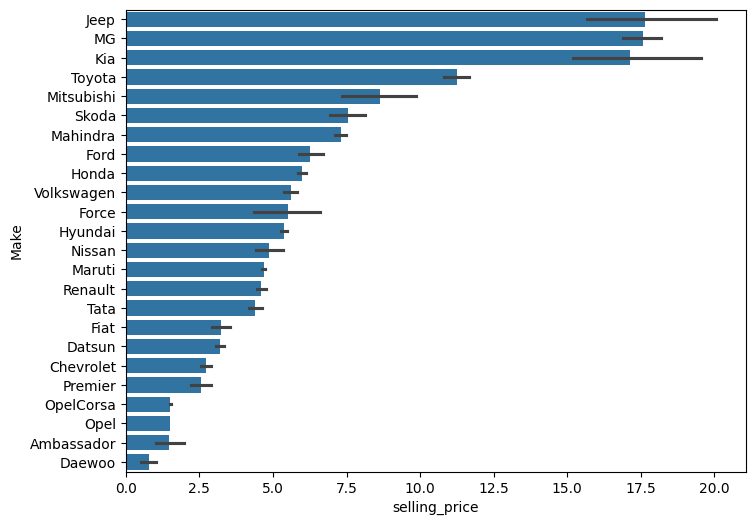

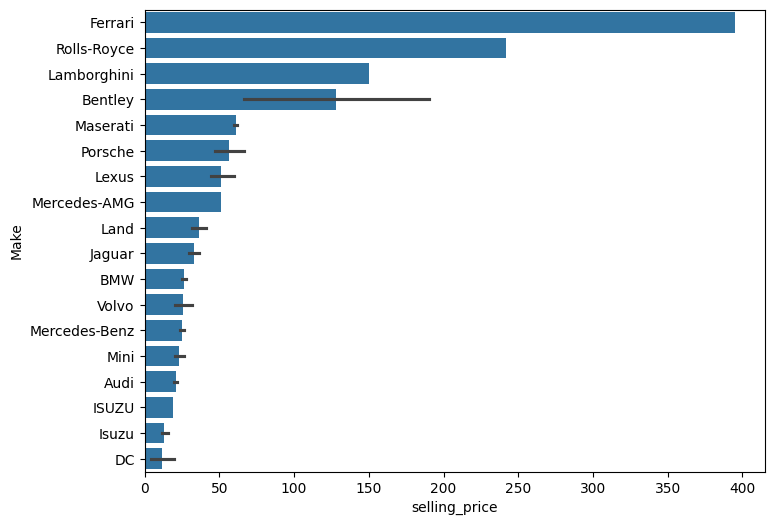

In [ ]:
#Premium Car Make and Selling Price
plt.figure(figsize=(8,6))
sns.barplot(data=df_premium,x='selling_price',y='Make',order=df_premium.groupby('Make')['selling_price'].mean().sort_values(ascending=False).index)
plt.xticks(rotation= 0)

#Luxury Car Make and Selling Price
plt.figure(figsize=(8,6))
sns.barplot(data=df_luxury,x='selling_price',y='Make',order=df_luxury.groupby('Make')['selling_price'].mean().sort_values(ascending=False).index)
plt.xticks(rotation= 0)

Distribution of Premium Cars and Selling Price

The graph above represents the distribution of premium car makers and their average selling prices. In this data set Jeep,MG and KIA has the highest selling prices at around 17 lakh. The reason could be that these three makers came into the Indian market very late. Thus most models can be from recent years.  Some of these makers have discontinued sales in India.That is probably why their selling prices are the lowest.

Distribution of Premium Cars and Selling Price

The graph above represents the distribution of luxury car makers and their average selling prices. The selling price for Bentley, Lamborghini ,Rolls-Royce and Ferrari are the highest ranging from  1.25 cr to 4cr respectively. The luxury segment can be classified into sports luxury  and luxury. The sports luxury category seems to be selling at higher prices.

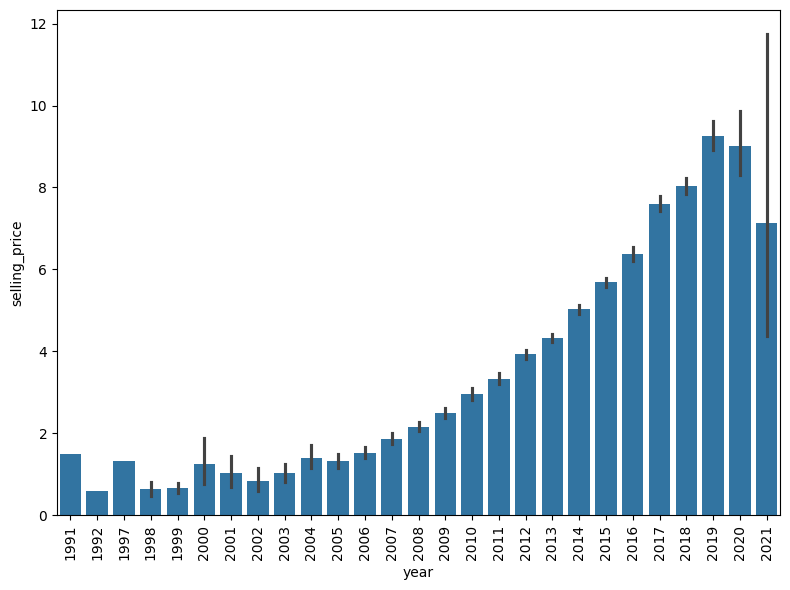

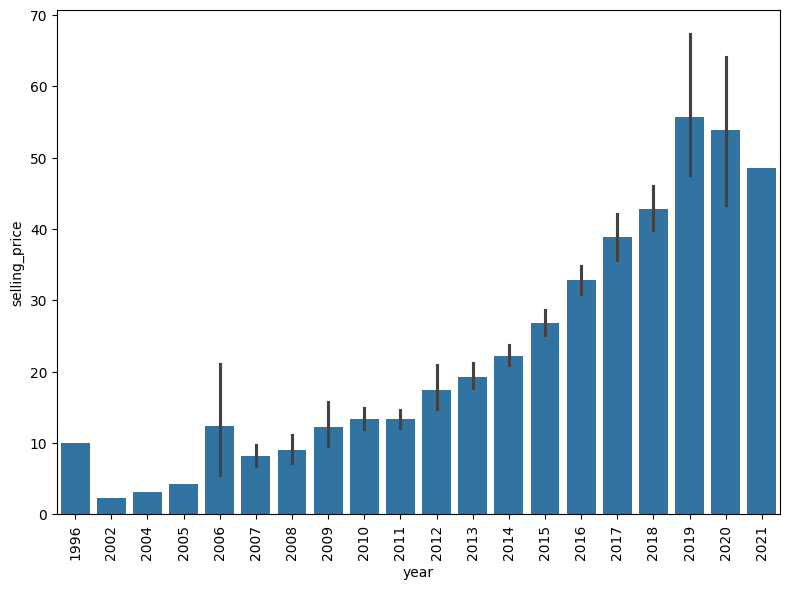

In [ ]:
#Year and Selling Price - Premium
plt.figure(figsize=(8,6))

sns.barplot(data=df_premium,x='year',y='selling_price',order=df_premium.groupby('year')['selling_price'].mean().index)
plt.xticks(rotation= 90)
plt.tight_layout()

#Year and Selling Price - Luxury
plt.figure(figsize=(8,6))

sns.barplot(data=df_luxury,x='year',y='selling_price',order=df_luxury.groupby('year')['selling_price'].mean().index)
plt.xticks(rotation= 90)
plt.tight_layout()

The graph above illustrates the distribution of year of model and their average selling prices for premium and luxury segments. Both, the premium and luxury segment indicates a similar distribution - the selling price increases with the recency of year of model. Some years - 2020 and 2021 models are selling lesser than its previous years. This can be due to the impact of covid virus forcing resellers to reduce prices.

Feature engineering column -> Depreciation rate = selling price/year. This column can help us understand brand depreciation rates.

Hypothesis Testing 1:

H0 - Mean depreciation rate is same across all brands.

Ha - Mean depreciation rate is not the same across all brands.

In [ ]:
from scipy.stats import f_oneway

df['Depreciation_rate'] = df['selling_price'] / (2025 - df['year'])

brand_groups = [
    group['Depreciation_rate'].dropna()
    for _, group in df.groupby('Make')
    if group['Depreciation_rate'].nunique() > 1  # need variation
]

f_stat, p_val = f_oneway(*brand_groups)
print(f"F-statistic: {f_stat}, p-value: {p_val}")

alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: Mean depreciation rate is not the same across all brands.")
else:
    print("Fail to reject the null hypothesis: Mean depreciation rate is the same across all brands.")

F-statistic: 333.6555295885381, p-value: 0.0
Reject the null hypothesis: Mean depreciation rate is not the same across all brands.


In [ ]:
#km_driven bins
bins = [100,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,150000,200000,300000]
labels =['100-10000','10001-20000','20001-30000','30001-40000','40001-50000','50001-60000','60001-70000','70001-80000','80001-90000','90001-100000','100001-150000','150001-200000','200001-300000']

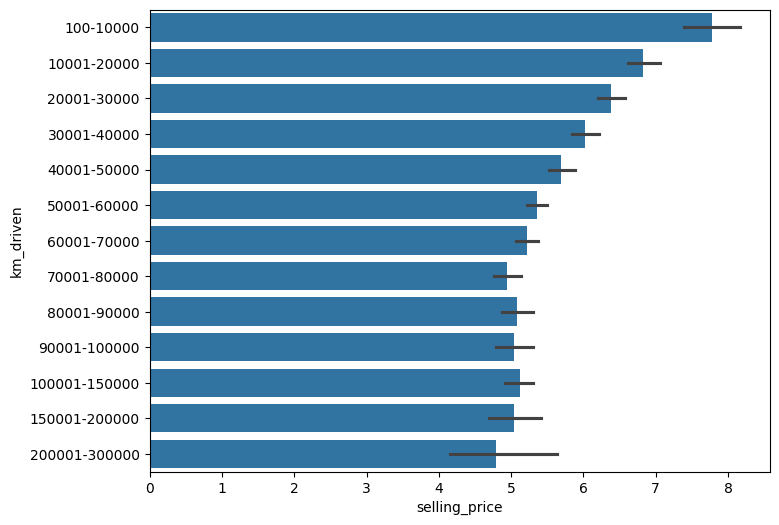

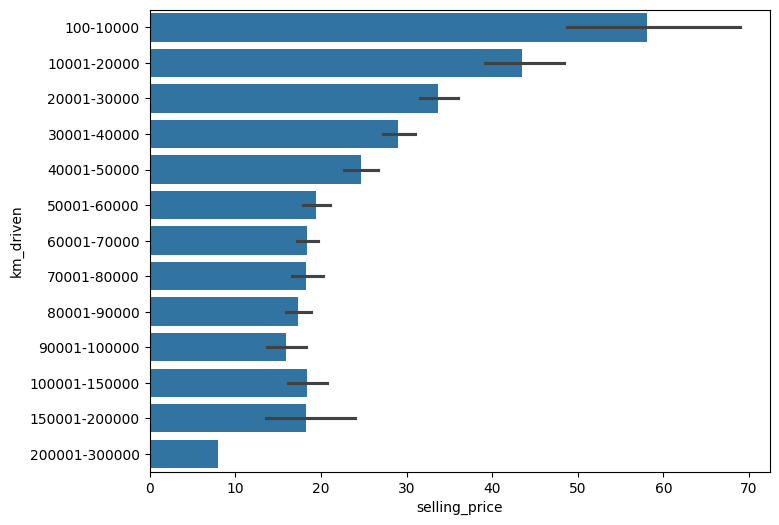

In [ ]:
#km_driven and Selling Price- Premium
plt.figure(figsize=(8,6))
sns.barplot(data=df_premium,x='selling_price',y=pd.cut(df_premium['km_driven'],bins=bins,labels=labels))
plt.xticks(rotation= 0)
plt.show()

#km_driven and Selling Price- Luxury
plt.figure(figsize=(8,6))
sns.barplot(data=df_luxury,x='selling_price',y=pd.cut(df_luxury['km_driven'],bins=bins,labels=labels))
plt.xticks(rotation= 0)
plt.show()

This graph represents the distribution of kilometers driven and its selling price. The trend indicates selling price reduces with increase in kilometers driven. The proportions of changes are minimal with max reading under 10,000km ,having an average price of Rs.7lakh. While a reading between 2 lakh and 3 lakh km has an average price of about Rs.5 lakh.

However, the luxury makers selling price reduces drastically with more kilometers driven. Readings up to 10,000km are priced at an average of about Rs.60 Lakh. While readings between 1.5 to 2 lakh are priced at an average of about Rs.18 lakh.

Hypothesis Test 2 : Km_driven

H0 - There is no significant difference in average selling price between low and high km driven cars.

Ha - There is significant difference in average selling price between low and high km driven cars.

In [ ]:
median_km = df['km_driven'].median()
df['mileage_group'] = df['km_driven'].apply(lambda x: 'Low' if x <= median_km else 'High')


In [ ]:
from scipy.stats import mannwhitneyu

u_stat, p_val = mannwhitneyu(low_prices, high_prices, alternative='greater')  # 'greater' means testing if low-mileage > high-mileage
print(f"U-statistic: {u_stat}, p-value: {p_val}")

alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: There is significant difference in average selling price between low and high km driven cars.")
    print("Low-mileage cars have higher average selling price.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average selling price between low and high km driven cars.")

U-statistic: 59610484.5, p-value: 6.68930355141362e-126
Reject the null hypothesis: There is significant difference in average selling price between low and high km driven cars.
Low-mileage cars have higher average selling price.


In [ ]:
#Bins for Engine Displacement
bins = [0,1000,2000,3000,4000,5000,6000,7000]
labels =['0-1000','1001-2000','2001-3000','3001-4000','4001-5000','5001-6000','6001-7000']

Hypothesis Test 3:

H0 : The mean selling price of cars is the same for all fuel types.

Ha : Fuel type has a mean selling price that is different from the others.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro, levene, f_oneway, kruskal

# ---------------------------
# 1. Prepare Groups
# ---------------------------
fuel_groups = [group['selling_price'].values
               for _, group in df.groupby('fuel_type')]

print("Fuel types in dataset:", df['fuel_type'].unique())

# ---------------------------
# 2. Check Normality per Group
# ---------------------------
normality_results = {}
for fuel, group in df.groupby('fuel_type')['selling_price']:
    sample = group.sample(5000, random_state=42) if len(group) > 5000 else group
    stat, pval = shapiro(sample)
    normality_results[fuel] = pval
    print(f"{fuel} - Shapiro p-value: {pval:.6f}")

all_normal = all(p > 0.05 for p in normality_results.values())

# ---------------------------
# 3. Check Equal Variances
# ---------------------------
levene_stat, levene_p = levene(*fuel_groups)
print(f"\nLevene’s Test p-value: {levene_p:.6f}")
equal_var = levene_p > 0.05

# ---------------------------
# 4. Run the Right Test
# ---------------------------
if all_normal and equal_var:
    # Parametric ANOVA
    stat, pval = f_oneway(*fuel_groups)
    test_used = "One-way ANOVA"
else:
    # Non-parametric Kruskal–Wallis
    stat, pval = kruskal(*fuel_groups)
    test_used = "Kruskal–Wallis (non-parametric)"

print(f"\nTest Used: {test_used}")
print(f"Statistic: {stat:.4f}, p-value: {pval:.6f}")

# ---------------------------
# 5. Interpretation
# ---------------------------
alpha = 0.05
if pval < alpha:
    print("✅ Reject Null Hypothesis: Selling price differs by fuel type.")
else:
    print("❌ Fail to Reject Null Hypothesis: No significant price difference between fuel types.")


Fuel types in dataset: ['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
CNG - Shapiro p-value: 0.000000
Diesel - Shapiro p-value: 0.000000
Electric - Shapiro p-value: 0.124996
LPG - Shapiro p-value: 0.056789
Petrol - Shapiro p-value: 0.000000

Levene’s Test p-value: 0.000000

Test Used: Kruskal–Wallis (non-parametric)
Statistic: 2794.8421, p-value: 0.000000
✅ Reject Null Hypothesis: Selling price differs by fuel type.


Hypothesis Test 4 :

H0 : The mean mileage is the same for Premium and Luxury cars.

Ha : The mean mileage is different for Premium and Luxury cars.

In [ ]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

# 1️⃣ Extract mileage for both segments
premium_mileage = df_premium['mileage']
luxury_mileage = df_luxury['mileage']

# 2️⃣ Normality test (Shapiro–Wilk)
shapiro_premium = shapiro(premium_mileage)
shapiro_luxury = shapiro(luxury_mileage)
print(f"Shapiro Premium: {shapiro_premium}")
print(f"Shapiro Luxury: {shapiro_luxury}")

# 3️⃣ Variance equality test (Levene’s)
levene_test = levene(premium_mileage, luxury_mileage)
print(f"Levene’s test: {levene_test}")

# 4️⃣ Hypothesis test selection
if shapiro_premium.pvalue > 0.05 and shapiro_luxury.pvalue > 0.05 and levene_test.pvalue > 0.05:
    # Parametric test → Independent t-test
    stat, p_val = ttest_ind(premium_mileage, luxury_mileage)
    print(f"T-test: stat={stat:.4f}, p-value={p_val:.4e}")
else:
    # Non-parametric test → Mann–Whitney U Test
    stat, p_val = mannwhitneyu(premium_mileage, luxury_mileage)
    print(f"Mann–Whitney U Test: stat={stat:.4f}, p-value={p_val:.4e}")

# 5️⃣ Interpretation
if p_val < 0.05:
    print("Reject H₀ → Mileage differs significantly between Premium and Luxury cars.")
else:
    print("Fail to reject H₀ → No significant difference in mileage between Premium and Luxury cars.")


Shapiro Premium: ShapiroResult(statistic=np.float64(0.9025598716776303), pvalue=np.float64(1.910809257937919e-74))
Shapiro Luxury: ShapiroResult(statistic=np.float64(0.9487650301329055), pvalue=np.float64(5.762755784738099e-23))
Levene’s test: LeveneResult(statistic=np.float64(27.61680262373992), pvalue=np.float64(1.4940712234681174e-07))
Mann–Whitney U Test: stat=22539274.5000, p-value=1.5673e-297
Reject H₀ → Mileage differs significantly between Premium and Luxury cars.


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 18410.
  res = hypotest_fun_out(*samples, **kwds)


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, '0-1000'),
  Text(1, 0, '1001-2000'),
  Text(2, 0, '2001-3000'),
  Text(3, 0, '3001-4000'),
  Text(4, 0, '4001-5000'),
  Text(5, 0, '5001-6000'),
  Text(6, 0, '6001-7000')])

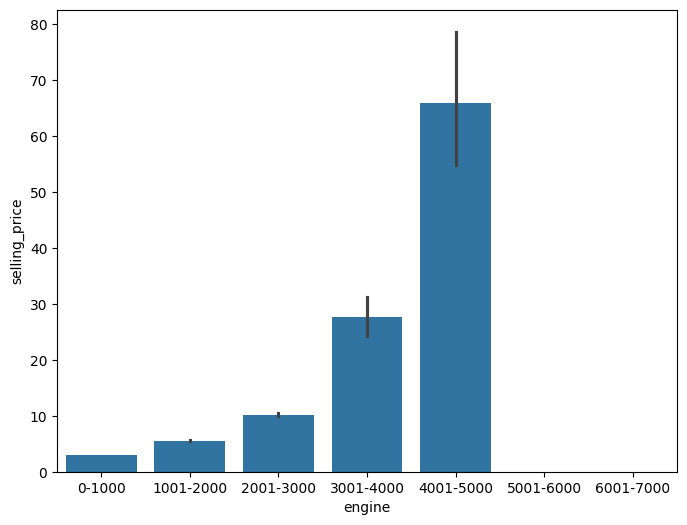

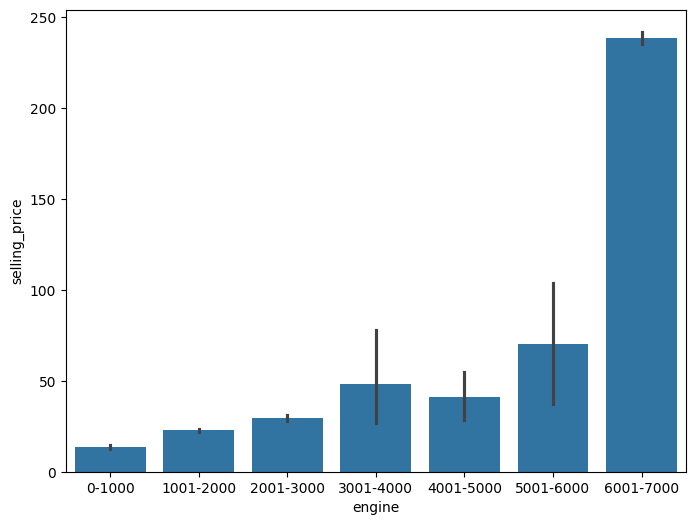

In [ ]:
# Engine and Selling Price - Premium
plt.figure(figsize=(8,6))
sns.barplot(data=df_premium,x=pd.cut(df_premium['engine'],bins=bins,labels=labels),y='selling_price')
plt.xticks(rotation= 0)

# Engine and Selling Price - Luxury
plt.figure(figsize=(8,6))
sns.barplot(data=df_luxury,x=pd.cut(df_luxury['engine'],bins=bins,labels=labels),y='selling_price')
plt.xticks(rotation= 0)

This graph represents the distribution of engine displacement and selling price. The selling price increases with increase in displacement value. Usually premium cars don’t have high displacement values over 3000 cc. As the two segments have been made up by make of cars, we are seeing a overlap of high end vehicles in an otherwise usually premium range car.

In [ ]:
from scipy.stats import shapiro, spearmanr, pearsonr

def engine_price_segment_test(segment_name):
    print(f"\n===== {segment_name.upper()} SEGMENT =====")

    # Filter data
    df_seg = df[df['Segment'] == segment_name][['engine', 'selling_price']].dropna()

    # Normality test for both variables
    p_engine = shapiro(df_seg['engine']).pvalue
    p_price  = shapiro(df_seg['selling_price']).pvalue
    print(f"Shapiro p-value (engine)       = {p_engine:.4f}")
    print(f"Shapiro p-value (selling_price) = {p_price:.4f}")

    # If both normal → Pearson, else Spearman
    if p_engine > 0.05 and p_price > 0.05:
        corr, p_val = pearsonr(df_seg['engine'], df_seg['selling_price'])
        method = "Pearson"
    else:
        corr, p_val = spearmanr(df_seg['engine'], df_seg['selling_price'])
        method = "Spearman"

    print(f"{method} correlation = {corr:.4f}, p-value = {p_val:.4e}")

    if p_val < 0.05:
        print("Reject H₀ → Significant relationship between engine size and selling price.")
    else:
        print("Fail to reject H₀ → No significant relationship between engine size and selling price.")

# Run for Premium and Luxury separately
engine_price_segment_test("Premium")
engine_price_segment_test("Luxury")



===== PREMIUM SEGMENT =====
Shapiro p-value (engine)       = 0.0000
Shapiro p-value (selling_price) = 0.0000
Spearman correlation = 0.5271, p-value = 0.0000e+00
Reject H₀ → Significant relationship between engine size and selling price.

===== LUXURY SEGMENT =====
Shapiro p-value (engine)       = 0.0000
Shapiro p-value (selling_price) = 0.0000
Spearman correlation = 0.3090, p-value = 4.5006e-36
Reject H₀ → Significant relationship between engine size and selling price.


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 18410.
  res = hypotest_fun_out(*samples, **kwds)


Key Insights

Price Range & Spread – Selling prices range from ₹25K to ₹3.95Cr, mean ₹7.39L; distribution is highly positively skewed with many outliers due to premium & luxury cars.

Make Distribution – Maruti dominates (25% of stock), followed by Hyundai, Honda, and others. Premium brands like Jeep, MG, Kia show higher average prices due to newer entry into market; luxury brands (Bentley, Lamborghini, Ferrari) command ₹1.25–₹4Cr.

Transmission & Fuel Mix – Manual cars form 80% of listings; diesel & petrol cars have almost equal share (~49% each). CNG/LPG/Electric are negligible due to dataset’s older year span (1991–2021, median 2014).

Depreciation Trend – Selling price generally decreases with age; drop is sharper in luxury brands. Some 2020–21 models priced lower than 2019 models, possibly due to pandemic-related price cuts.

Mileage & Price – Weak negative correlation (-0.25); higher mileage (km/lt) does not guarantee higher resale prices.

Km Driven & Price – Weak negative correlation (-0.1) overall; luxury cars show steep price decline with higher km.

Engine & Power Influence – Strong positive correlation of engine capacity (0.58) and max power (0.73) with selling price.

Seats – No significant relationship with price; most cars are 5-seaters (83.5%).

Hypothesis Testing – Significant differences found for:

Depreciation rates across brands.

Price difference between low & high km driven cars.

Selling price differences by fuel type.

Mileage differences between Premium & Luxury cars.

Recommendations

Price Setting – Use engine size, max power, year, and brand as key predictors for pricing models. Avoid over-relying on mileage or seats for valuation.

Inventory Mix – Maintain higher stock of popular premium brands with steady resale value (e.g., Toyota, Honda) and selected high-demand luxury models for niche buyers.

Fuel Strategy – Given significant price differences across fuel types, tailor marketing & pricing strategies for each fuel segment.

Depreciation Insights – Track brand-specific depreciation rates to optimize purchase timing; focus on newer models from brands with slower depreciation.

Luxury Car Sales – Limit high-km luxury stock as their resale value drops sharply; prioritize low-km, recent models.

Transmission Trends – With 20% share, automatic cars present growth potential; consider targeted promotions for these.

Data-Driven Pricing Model – Implement regression-based or machine learning pricing tool using key correlated variables for scientific price setting